In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Set crypto variable
crypto = 'SOL'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [5]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-15,142.03,158.64,141.35,158.19,158.19,3585715674
2024-05-16,158.19,164.32,156.77,159.12,159.12,3498272951
2024-05-17,159.12,171.61,159.12,169.53,169.53,3371355809
2024-05-18,169.53,175.78,168.93,172.54,172.54,2479657643
2024-05-19,172.54,175.19,166.73,170.09,170.09,2300080451


In [6]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

170.09

In [7]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998635,0.998198,0.997101,0.997101,0.725669
High,0.998635,1.000000,0.997879,0.998873,0.998873,0.741562
Low,0.998198,0.997879,1.000000,0.998374,0.998374,0.711244
Close,0.997101,0.998873,0.998374,1.000000,1.000000,0.730636
Adj Close,0.997101,0.998873,0.998374,1.000000,1.000000,0.730636
Volume,0.725669,0.741562,0.711244,0.730636,0.730636,1.000000


In [8]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [9]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2020-04-10,0.951054,87364276
2020-04-11,0.776819,43862444
2020-04-12,0.882507,38736897
2020-04-13,0.777832,18211285
2020-04-14,0.661925,16747614
...,...,...
2024-05-15,158.190000,3585715674
2024-05-16,159.120000,3498272951
2024-05-17,169.530000,3371355809


In [10]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2020-05-29,0.579415,2066857,0.590875,0.607929,0.638247
2020-05-30,0.587933,2449095,0.591753,0.604491,0.630985
2020-05-31,0.570022,1892967,0.587863,0.599199,0.626849
2020-06-01,0.577495,2159877,0.581725,0.594586,0.620749
2020-06-02,0.564669,1295757,0.576889,0.590758,0.616485


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-15,158.19,3585715674,147.863146,144.223497,157.003440
2024-05-16,159.12,3498272951,148.494906,144.984853,156.458611
2024-05-17,169.53,3371355809,150.634474,146.240314,156.056778
2024-05-18,172.54,2479657643,153.659000,147.255567,155.663019
2024-05-19,170.09,2300080451,155.383000,148.169217,155.177108


<Axes: xlabel='Date'>

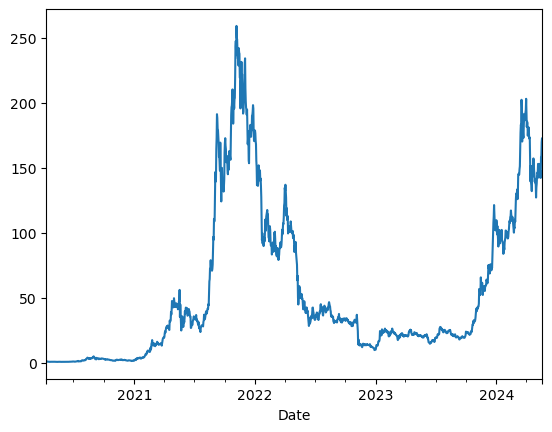

In [12]:
# Plot Close
df_close['Close'].plot()

In [13]:
## Create a Time Series Model with Prophet

In [14]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2020-04-10,0.951054,87364276
1,2020-04-11,0.776819,43862444
2,2020-04-12,0.882507,38736897
3,2020-04-13,0.777832,18211285
4,2020-04-14,0.661925,16747614
...,...,...,...
1496,2024-05-15,158.190000,3585715674
1497,2024-05-16,159.120000,3498272951
1498,2024-05-17,169.530000,3371355809
1499,2024-05-18,172.540000,2479657643


In [16]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [17]:
# Fit the time-series model.
crypto_model.fit(df_close)

18:07:28 - cmdstanpy - INFO - Chain [1] start processing
18:07:28 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
1586,2024-08-13
1587,2024-08-14
1588,2024-08-15
1589,2024-08-16
1590,2024-08-17


In [19]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1561,2024-07-19,190.227028,163.667640,207.571672,181.426783,198.922106,-3.629569,-3.629569,-3.629569,-0.194603,-0.194603,-0.194603,-3.434966,-3.434966,-3.434966,0.0,0.0,0.0,186.597459
1562,2024-07-20,190.724181,167.059794,208.849149,181.633267,200.000435,-3.336057,-3.336057,-3.336057,0.167827,0.167827,0.167827,-3.503884,-3.503884,-3.503884,0.0,0.0,0.0,187.388124
1563,2024-07-21,191.221335,166.065779,209.023985,181.846933,200.677614,-3.281798,-3.281798,-3.281798,0.308427,0.308427,0.308427,-3.590226,-3.590226,-3.590226,0.0,0.0,0.0,187.939536
1564,2024-07-22,191.718488,166.631667,208.225924,182.011161,201.347964,-3.691328,-3.691328,-3.691328,0.004528,0.004528,0.004528,-3.695856,-3.695856,-3.695856,0.0,0.0,0.0,188.027160
1565,2024-07-23,192.215641,165.148131,208.320243,182.238332,202.018313,-4.334431,-4.334431,-4.334431,-0.512185,-0.512185,-0.512185,-3.822246,-3.822246,-3.822246,0.0,0.0,0.0,187.881210
1566,2024-07-24,192.712795,166.543899,210.460165,182.292497,202.892785,-3.875790,-3.875790,-3.875790,0.094620,0.094620,0.094620,-3.970410,-3.970410,-3.970410,0.0,0.0,0.0,188.837004
1567,2024-07-25,193.209948,166.509954,211.204237,182.541504,203.775826,-4.009473,-4.009473,-4.009473,0.131386,0.131386,0.131386,-4.140859,-4.140859,-4.140859,0.0,0.0,0.0,189.200475
1568,2024-07-26,193.707101,169.242117,212.693171,182.792023,204.651788,-4.528162,-4.528162,-4.528162,-0.194603,-0.194603,-0.194603,-4.333558,-4.333558,-4.333558,0.0,0.0,0.0,189.178940
1569,2024-07-27,194.204254,167.825208,211.506994,183.039517,205.546357,-4.380072,-4.380072,-4.380072,0.167827,0.167827,0.167827,-4.547899,-4.547899,-4.547899,0.0,0.0,0.0,189.824183
1570,2024-07-28,194.701408,166.442783,211.404245,183.238451,206.368126,-4.474247,-4.474247,-4.474247,0.308427,0.308427,0.308427,-4.782674,-4.782674,-4.782674,0.0,0.0,0.0,190.227161


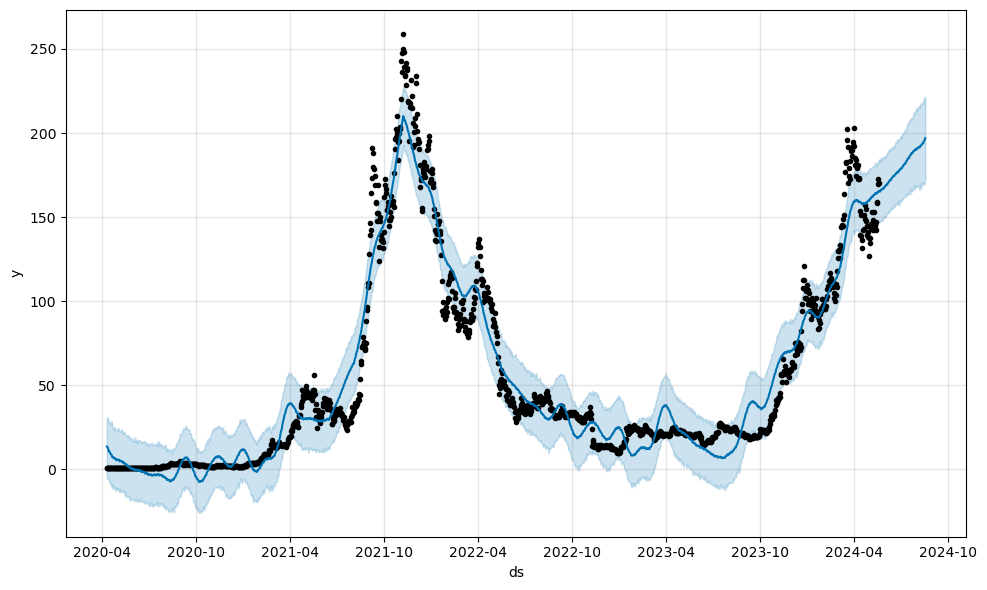

In [20]:
# Plot the Prophet predictions for the data
fig_forecast = crypto_model.plot(crypto_forecast)

In [21]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [22]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-05-20,165.460483,147.590753,182.466190
2024-05-21,165.136983,146.934191,185.098550
2024-05-22,165.944516,148.239794,183.589303
2024-05-23,166.191783,148.256707,183.982068
2024-05-24,166.088045,148.495928,183.543197
...,...,...,...
2024-08-13,193.791234,170.278501,217.363612
2024-08-14,194.933987,169.694249,220.616269
2024-08-15,195.564338,169.256497,220.914684


In [23]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

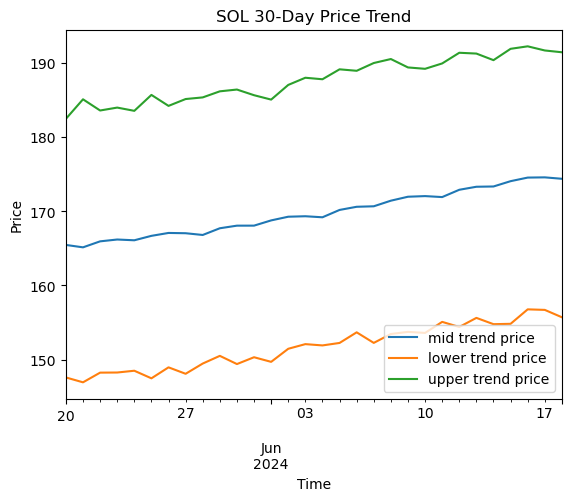

In [24]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

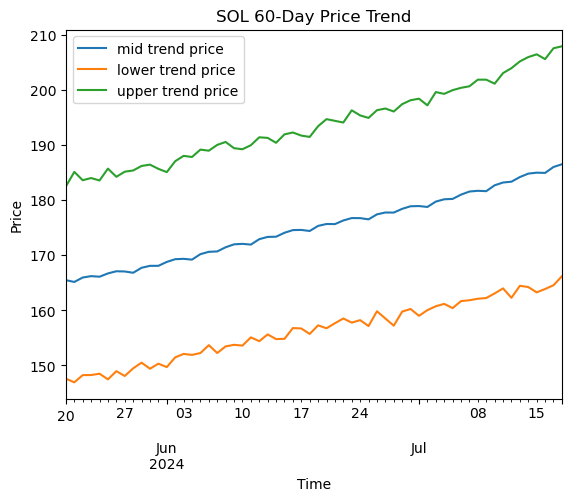

In [25]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

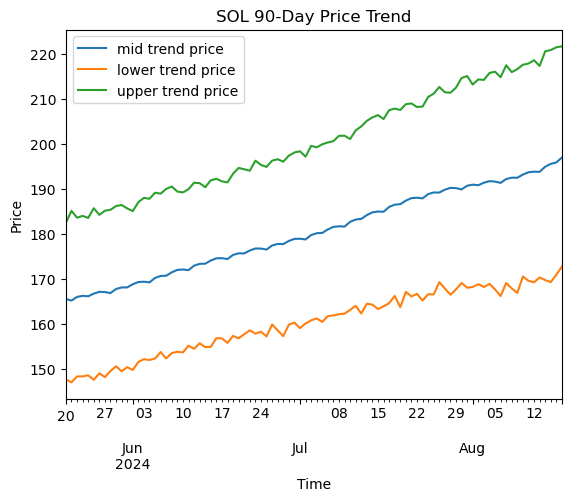

In [26]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.savefig(f'{crypto}_90d_trend_forecast', bbox_inches = 'tight')
plt.show()

In [27]:
# Retrieve last closing price
last_close_price

170.09

In [28]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

165.46048306173094

In [29]:
# Calculate tommorrow's weighted price
wp = last_close_price*.5 + tommorow_mid_trend_price*.5
wp

167.77524153086546

In [30]:
# Retreive tomorrow's weighted trend price forecast
tommorow_mid_trend_price = ((crypto_forecast['mid trend price'].iloc[-90]*.6)+(crypto_forecast['upper trend price'].iloc[-90]*.2)+(crypto_forecast['lower trend price'].iloc[-90]*.2))
tommorow_mid_trend_price

165.28767827117096

In [31]:
# Retrieve weighted trend price in 30 days
mid_trend_price_in_30 = ((crypto_forecast['mid trend price'].iloc[-60]*.6)+(crypto_forecast['upper trend price'].iloc[-60]*.2)+(crypto_forecast['lower trend price'].iloc[-60]*.2))
mid_trend_price_in_30

175.31433354733784

In [32]:
# Retrieve weighted trend price in 60 days
mid_trend_price_in_60 = ((crypto_forecast['mid trend price'].iloc[-30]*.6)+(crypto_forecast['upper trend price'].iloc[-30]*.2)+(crypto_forecast['lower trend price'].iloc[-30]*.2))
mid_trend_price_in_60

186.20633773044625

In [33]:
# Retrieve weighted trend price in 90 days
mid_trend_price_in_90 = ((crypto_forecast['mid trend price'].iloc[-1]*.6)+(crypto_forecast['upper trend price'].iloc[-1]*.2)+(crypto_forecast['lower trend price'].iloc[-1]*.2))
mid_trend_price_in_90

197.06833210775554

In [34]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
#percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30 = ((mid_trend_price_in_30)/(wp))-1
percent_diff_30.round(3)

0.045

In [35]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
#percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60 = ((mid_trend_price_in_60)/(wp))-1
percent_diff_60.round(3)

0.11

In [36]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
#percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90 = ((mid_trend_price_in_90)/(wp))-1
percent_diff_90.round(3)

0.175

In [37]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

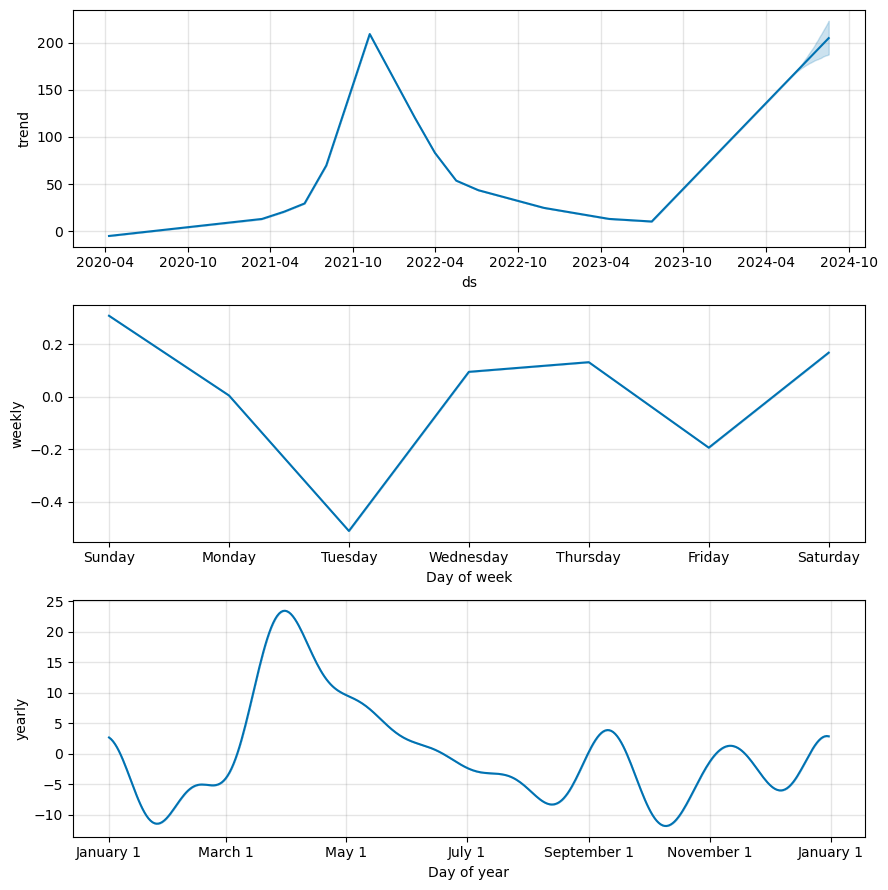

In [38]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig_comp = crypto_model.plot_components(crypto_forecast)
plt.savefig(f'{crypto}_components.png', bbox_inches = 'tight')

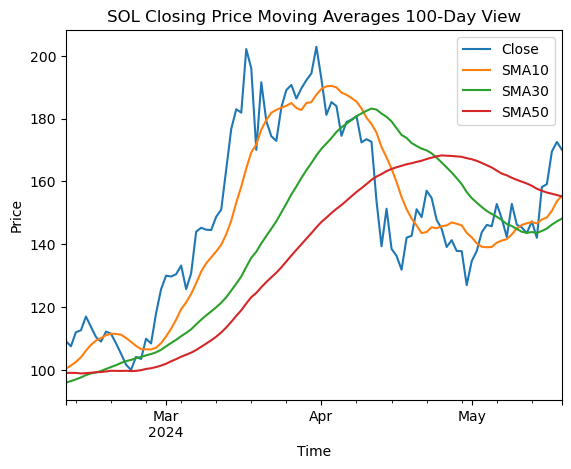

In [39]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

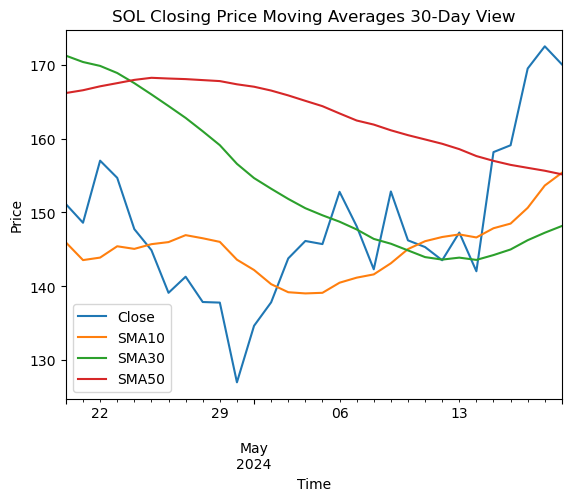

In [40]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View') 
plt.savefig(f'{crypto}_30d_MA_view.png', bbox_inches = 'tight')
plt.show()

In [41]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-05-20
File created :  2024-05-20.csv


In [42]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [43]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.467602,0.016141654551261597,-0.048511607018260405,0.26698037580557354
BNB,574.63,-0.3370363083405419,-0.3290568236386213,-0.2790790471601129
BONK,2.5e-05,0.25779530706847753,0.4080859075709553,0.5429258111537147
BTC,66278.37,-0.2191180233361938,-0.1951255528263407,-0.16020045358030566
DOGE,0.149107,-0.22857973922643027,-0.28954294972299366,-0.13383869168157447
ETH,3094.12,-0.05566025624110993,-0.04356552970504457,0.046438254274701274
PEPE,9e-06,0.3163098292378519,0.5695209080409678,0.79019064181281
SHIB,2.4e-05,-0.13447450951251372,-0.07783705937680974,-0.018044767636294923
SOL,170.09,0.02993653747852032,0.09897686371903935,0.15883864333841902
XRP,0.509661,0.08170842018061886,0.1175389631277377,0.251808862234169
ADA,0.467602,-0.05356931769426376,-0.12050457682285454,0.1829944797779357
ADA,0.467602,-0.07589607234414741,-0.135242805763105,0.15993249027663747
BNB,574.63,-0.23839504335644301,-0.2336482812093087,-0.1748296149590688
BONK,2.5e-05,0.1887956631518306,0.32592832450639286,0